# <img src="./assets/course-icon.png" style="height:50px;display:inline"> ECE 046211- Technion - Deep Learning
---

#### <a href="https://taldatech.github.io">Tal Daniel</a>

## Tutorial 02 - Single Neuron
---

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---

* [Discriminative Models](#-Discriminative-Models)
* [The Perceptron](#-The-Perceptron)
* [Logistic Regression](#-Logistic-Regression)
    * [Logistic Regression with PyTorch](#-Logistic-Regression-with-PyTorch)
* [Multi-Class (Multinomial) Logistic Regression - Softmax Regression](#-Multi-Class-(Multinomial)-Logistic-Regression---Softmax-Regression)
* [Activation Functions](#-Activation-Functions)
* [Recommended Videos](#-Recommended-Videos)
* [Credits](#-Credits)

#### <img src="./assets/colab_icon.PNG" style="height:30px;display:inline"> Additional Packages for Google Colab
----
If you are using <a href="https://colab.research.google.com/">Google Colab</a>, you have to install additional packages. To do this, simply run the following cell.

In [1]:
# to work locally (win/linux/mac), first install 'graphviz': https://graphviz.org/download/ and restart your machine
!pip install torchviz

     |████████████████████████████████| 51kB 3.7MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3522 sha256=6a736ad7c5fb8745a0b4912099f190f303604fe6b847bd2e0ab2e6141c6b5828
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


In [1]:
# imports for the tutorial
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torchviz
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## <img src="https://img.icons8.com/nolan/64/000000/categorize.png" style="height:50px;display:inline"> Discriminative Models
---
* **Discriminative models** are a class of models used in statistical classification, especially in supervised machine learning. A discriminative classifier tries to build a model just by depending on the observed data while learning how to do the classification from the given statistics.  
    * Compared to **generative models**, discriminative models make fewer assumptions on the distributions but depend heavily on the quality of the data.
    * For example, given a set of labeled pictures of dog and rabbit, discriminative models will be matching a new, unlabeled picture to a most similar labeled picture and then give out the label class, a dog or a rabbit.
* The typical discriminative learning approaches include Logistic Regression (LR), Support Vector Machine (SVM), conditional random fields (CRFs) (specified over an undirected graph), and others.

### <img src="https://img.icons8.com/plasticine/100/000000/mind-map.png" style="height:50px;display:inline"> The Perceptron
---
* One of the first and simplest linear model.
* Based on a *linear threshold unit* (LTU): the input and output are numbers (not binary values), and each connection is associated with a weight.
* The LTU computes a weighted sum of its inputs: $z = w_1x_1 + w_2x_2 +....+w_nx_n = w^Tx$, and then it applies a **step function** to that sum and outputs the result: $$ h_w(x) = step(z) = step(w^Tx) $$


* Illustration:
<center><img src="./assets/perceptron.jpg" style="height:200px"></center>
* The most common step function used is the *Heaviside step function* but sometimes the *sign function* is used (as is the illustration).

* **Perceptron Training** draws inspiration from biological neurons: the connection weight between two neurons is increased whenever they have **the same output**. Perceptrons are trained by considering the error made.
    * At each iteration, the Perceptron is fed with one training instance and makes a prediction for it.
    * For every output that produced a wrong prediction, it reinforces the connection weights from the inputs that would have contributed to the correct prediction.
    * Criterion: $ E^{perc}(w) = - \sum_{i \in D_{miss}}w^T(x^iy^i) $
* **Perceptron Learning Rule (weight update)**: $$ w_{t+1} = w_t +\eta(y_i -sign(w_t^Tx_i))x_i $$
    * $\eta$ is the learing rate (hyper-parameter).
* The decision boundary learned is linear, the Perceptron is incapable of learning complex patterns.

* **Perceptron Convergence Theorem**: If the training instances are **linearly seperable**, the algorithm would converge to a solution.
    * **There can be multiple solutions (multiple hyperplanes)**.
* Perceptrons do not output a class probability, they just make predicitons based on a **hard threshold**.

* **Pseudocode**:
    * **Require**: Learning rate $\eta$
    * **Require**: Initial parameter $w$
    * **While** stopping criterion not met **do**
        * For $i=1,...,m$:
            * $ w_{t+1} \leftarrow w_t +\eta(y_i -sign(w_t^Tx_i))x_i $
        * $t \leftarrow t + 1$
    * **end while**

In [2]:
# let's load the cancer dataset, shuffle it and  speratre into train and test set
dataset = pd.read_csv('./datasets/cancer_dataset.csv')
# print the number of rows in the data set
number_of_rows = len(dataset)
num_train = int(0.8 * number_of_rows)
# reminder, the data looks like this
dataset.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
351,899667,M,15.750,19.22,107.10,758.6,0.12430,0.23640,0.29140,0.12420,...,24.17,119.40,915.3,0.15500,0.50460,0.68720,0.21350,0.4245,0.10500,NaN
27,852781,M,18.610,20.25,122.10,1094.0,0.09440,0.10660,0.14900,0.07731,...,27.26,139.90,1403.0,0.13380,0.21170,0.34460,0.14900,0.2341,0.07421,NaN
568,92751,B,7.760,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.00000,0.00000,0.2871,0.07039,NaN
535,919555,M,20.550,20.86,137.80,1308.0,0.10460,0.17390,0.20850,0.13220,...,25.48,160.20,1809.0,0.12680,0.31350,0.44330,0.21480,0.3077,0.07569,NaN
497,914580,B,12.470,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,...,24.34,92.82,607.3,0.12760,0.25060,0.20280,0.10530,0.3035,0.07661,NaN
358,9010333,B,8.878,15.49,56.74,241.0,0.08293,0.07698,0.04721,0.02381,...,17.70,65.27,302.0,0.10150,0.12480,0.09441,0.04762,0.2434,0.07431,NaN
75,8610404,M,16.070,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,...,24.56,128.80,1223.0,0.15000,0.20450,0.28290,0.15200,0.2650,0.06387,NaN
464,911320502,B,13.170,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,...,23.89,95.10,687.6,0.12820,0.19650,0.18760,0.10450,0.2235,0.06925,NaN
323,895100,M,20.340,21.51,135.90,1264.0,0.11700,0.18750,0.25650,0.15040,...,31.86,171.10,1938.0,0.15920,0.44920,0.53440,0.26850,0.5558,0.10240,NaN
485,913063,B,12.450,16.41,82.85,476.7,0.09514,0.15110,0.15440,0.04846,...,21.03,97.82,580.6,0.11750,0.40610,0.48960,0.13420,0.3231,0.10340,NaN


In [3]:
# we will take the first 2 features as our data (X) and the diagnosis as labels (y)
x = dataset[['radius_mean', 'texture_mean']].values
y = dataset['diagnosis'].values == 'M'  # 1 for Malignat, 0 for Benign
# shuffle
rand_gen = np.random.RandomState(0)
shuffled_indices = rand_gen.permutation(np.arange(len(x)))

x_train = x[shuffled_indices[:num_train]]
y_train = y[shuffled_indices[:num_train]]
x_test = x[shuffled_indices[num_train:]]
y_test = y[shuffled_indices[num_train:]]

print("total training samples: {}, total test samples: {}".format(num_train, number_of_rows - num_train))

total training samples: 455, total test samples: 114


In [4]:
# fit scaler on training data (not on test data!)
scaler = StandardScaler().fit(x_train)

# transform training data
x_train = scaler.transform(x_train)

# transform testing data
x_test = scaler.transform(x_test)

In [5]:
# perceptron using Scikit-Learn
per_clf = Perceptron(max_iter=1000)
per_clf.fit(x_train, y_train)
y_pred = per_clf.predict(x_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("perceptron accuracy: {:.3f} %".format(accuracy * 100))
w = (per_clf.coef_).reshape(-1,)
b = (per_clf.intercept_).reshape(-1,)
boundary = (-b -w[0] * x_train[:, 0]) / w[1] 

perceptron accuracy: 85.088 %


In [8]:
def plot_perceptron_result():
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x_train[y_train,0], x_train[y_train, 1], color='r', label="M, train", alpha=0.5)
    ax.scatter(x_train[~y_train,0], x_train[~y_train, 1], color='b', label="B, train", alpha=0.5)
    ax.scatter(x_test[y_test,0], x_test[y_test, 1], color='r', label="M, test", alpha=1)
    ax.scatter(x_test[~y_test,0], x_test[~y_test, 1], color='b', label="B, test", alpha=1)
    ax.plot(x_train[:,0], boundary, label="decision boundary", color='g')
    ax.legend()
    ax.grid()
    ax.set_ylim([-5, 5])
    ax.set_xlabel("radius_mean")
    ax.set_ylabel("texture_mean")
    ax.set_title("texture_mean vs. radius_mean")

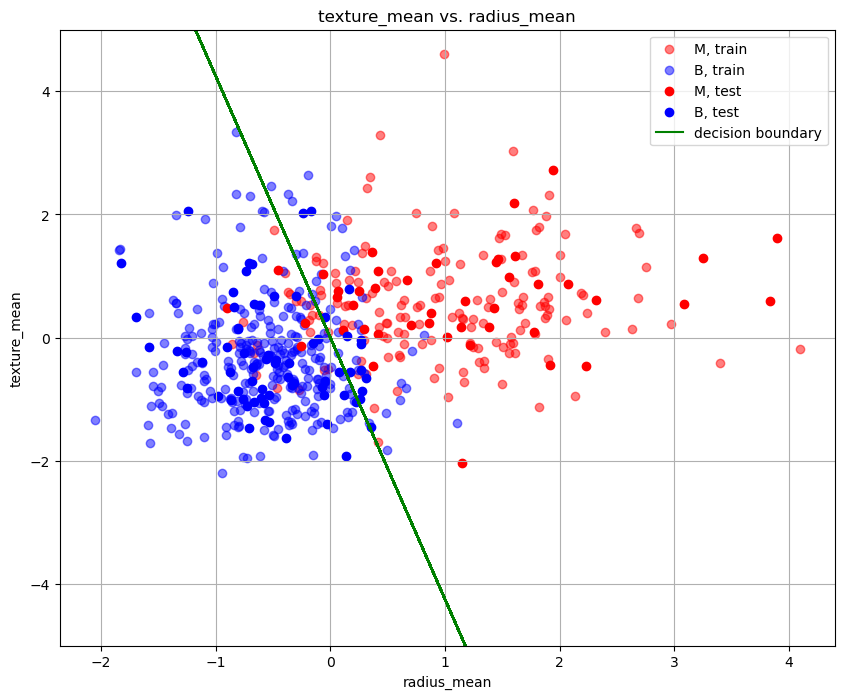

In [9]:
# plot
plot_perceptron_result()

### <img src="https://img.icons8.com/dusk/64/000000/cheap-2.png" style="height:50px;display:inline"> MLE with Bernoulli Assumption
---
* Recall that there is a connection between maximum likelihood estimation (MLE) and linear regression when we assume that the data can be created as follows: $y=\theta^Tx + \epsilon$, where $\epsilon \sim \mathcal{N}(0, \sigma^2) \to y \sim \mathcal{N}(\theta^Tx, \sigma^2)$.
    * In this case, **minimizing** the negative log-likelihood (NLL): $-\log P(y|x;\theta)$ results in the MSE error $(y-\theta^Tx)^2$, and **minimizing** the NLL is the same as **maximizing** $\log P(y|x;\theta)$, which is exactly the MLE!
* When we assume that the data is created in a different way, we get different loss functions, as we will now demonstrate. But the idea is the same --

  **maximizing the log-likelihood (MLE) = minimizing the negative log-likelihood (NLL)**.
  $$ \log P(y|x;\theta) = \log \left[\frac{1}{\sqrt{2 \pi \sigma^2}} \exp{\left(-\frac{(y - \theta^Tx)^2}{2\sigma^2}\right)} \right] $$
  $$ = -0.5\log(2\pi\sigma^2) -\frac{1}{2\sigma^2}(y -\theta^Tx)^2$$
  $$ \to \max_{\theta}\log P(y|x;\theta) = \min_{\theta}-\log P(y|x;\theta) = \min_{\theta}\frac{1}{2}(y -\theta^Tx)^2 = \min_{\theta} MSE $$
* The *Sigmoid* function (also the Logistic Function): $$ \sigma(x) = \frac{1}{1+e^{-x}} = \frac{e^x}{1+e^x} $$
    * The output is in $[0,1]$, which is exactly what we need to model a probability distribution.
* We assume that: $$ P(y|x,\theta) = Bern(y|\sigma(\theta^Tx)) $$
    * Bernoulli Distribution (coin flip): $$ P(y) = p^y(1-p)^{1-y} $$
    * $p = \sigma(\theta^Tx) \in [0,1]$
* We will use the following notations:

$$P(y_i|x_i, w) = \begin{cases}
    \pi_{i1} = \sigma(w^Tx) =  \frac{1}{1+e^{-x}}     & \quad \text{if } y_i=1 \\
    \pi_{i0} = 1 -  \sigma(w^Tx) = 1 -  \frac{1}{1+e^{-x}}    & \quad \text{if } y_i = 0  
  \end{cases} $$

In [10]:
# let's see the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-5, 5, 1000)
sig_x = sigmoid(x)

Text(0, 0.5, 'sigmoid(x)')

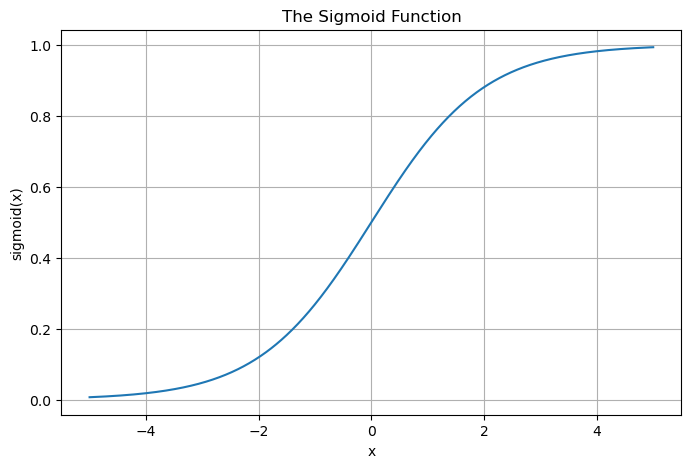

In [11]:
# plot
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.plot(x, sig_x)
ax.grid()
ax.set_title("The Sigmoid Function")
ax.set_xlabel("x")
ax.set_ylabel("sigmoid(x)")

### <img src="https://img.icons8.com/cotton/64/000000/combo-chart.png" style="height:50px;display:inline"> Logistic Regression
---
* Some regression algorithms can be used for **classification** as well.
* *Logistic Regression* is commonly used to **estimate the probability** that an instance belongs to a particular class.
    * Typically, if the estimated proabibility is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled "1"), or else it predicts that it does not - a binary classifier.
* **Estimating Probabilities** - Similarly to *Linear Regression*, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but unlike Linear Regression, it outputs the **logistic** of the weighted sum - $\sigma(w^Tx)$, which is a number between 0 and 1.

#### Training and Cost Function
---
* The objective of training is to set the parameter vector $\theta$ (or $w$) so that the model estimates high probabilities for positive instances ($y=1$) and low probabilities for negative instances ($y=0$)
* Expanding the expression using the negative log-likelihood (NLL): 
    $$ P(y|x,\theta) = Bern(y|\sigma(\theta^Tx)) \rightarrow NLL(\theta) = -\frac{1}{m}\sum_{i=1}^m \log \sigma(\theta^Tx_i)^{y_i}(1-\sigma(\theta^Tx_i))^{1-y_i} =- \frac{1}{m} \sum_{i=1}^m\log\pi_{i1}^{y_i}\pi_{i0}^{1-y_i} $$
    $$ =  -\frac{1}{m} \sum_{i=1}^m \left[y_i\log\pi_{i1} + (1-y_i)\log\pi_{i0} \right]$$

* This yields **the Logistic Regression cost function (log loss)**: $$ J(\theta) = -\frac{1}{m} \sum_{i=1}^m \big[ y_i\log \pi_{i1} + (1-y_i)\log \pi_{i0} \big] = -\frac{1}{m} \sum_{i=1}^m \big[ y_i\log \pi_{i1} + (1-y_i)\log (1 - \pi_{i1}) \big] $$
    * Intuition: $-\log(t)$ grows very large when $t$ approaches 0, so the cost will be large if the model estimates a probability close to 0 for a **positive instance**, and it will also be very large if the estimated probability is close to 1 for a **negative instance**. On the other hand, $-log(t)$ is close to 0 when $t$ is close to 1, so the cost will be close to 0 if the estimated probability is close to 0 for a **negative instance** or close to 1 for a **positive instance**.
    * This expression is also called the **binary cross-entropy (BCE)** loss.
    * The cost function in the case of *Logistic Regression* is **convex**.

* **Logistic cost function derivatives**: $$ \frac{\partial}{\partial \theta_j}J(\theta) = \frac{1}{m}\sum_{i=1}^m \big( \sigma(\theta^Tx^{i}) - y_i \big) x_j^{i} $$
    * No closed-form solution.
    * Thanks to the convexity of the cost function (for the case of Logistic Regression), we can use **Gradient Descent** (or SGD, Mini-Batch GD).

In [12]:
def plot_lr_boundary(x_train, x_test, y_train, y_test, boundary):
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x_train[y_train,0], x_train[y_train, 1], color='r', label="M, train", alpha=0.5)
    ax.scatter(x_train[~y_train,0], x_train[~y_train, 1], color='b', label="B, train", alpha=0.5)
    ax.scatter(x_test[y_test,0], x_test[y_test, 1], color='r', label="M, test", alpha=1)
    ax.scatter(x_test[~y_test,0], x_test[~y_test, 1], color='b', label="B, test", alpha=1)
    ax.plot(x_train[:,0], boundary, label="decision boundary", color='g')
    ax.legend()
    ax.grid()
    ax.set_ylim([-5, 5])
    ax.set_xlabel("radius_mean")
    ax.set_ylabel("texture_mean")
    ax.set_title("texture_mean vs. radius_mean")

In [13]:
# logistic regression with scikit-learn
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Logistic Regression accuracy: {:.3f} %".format(accuracy * 100))
w = (log_reg.coef_).reshape(-1,)
b = (log_reg.intercept_).reshape(-1,)
boundary = (-b -w[0] * x_train[:, 0]) / w[1] 

Logistic Regression accuracy: 90.351 %


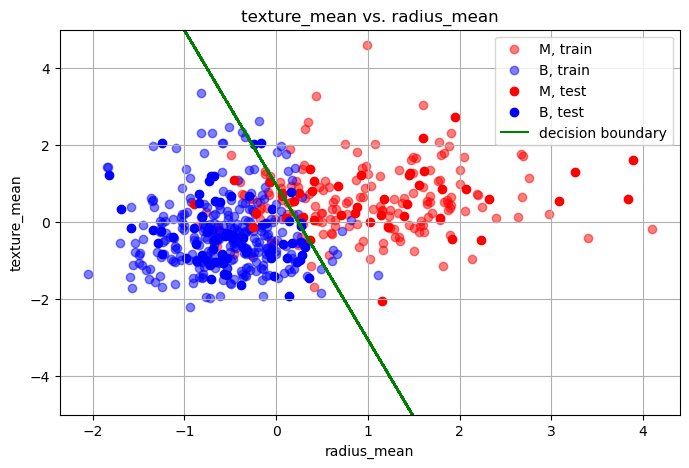

In [14]:
# plot
plot_lr_boundary(x_train, x_test, y_train, y_test, boundary)

### <img src="https://img.icons8.com/color/96/000000/firestorm.png" style="height:50px;display:inline"> Logistic Regression with PyTorch
---
* We will now get familiar with building neural networks with PyTorch.
* All neural network models inherit from a parent class `nn.Module`. The user must implement the `__init__()` and `__forward()__` methods.
* In `__init__()` we initialize the parameters of the neural networks, e.g., number of parameters (such as number of hidden units/layers, type of layers and etc...)
* In `__forward()__` we implement the forward pass of the network, i.e., what happens to the input.
    * For example, if in `__init__()` you defined a linear layer and a ReLU activation, then in `__forward()__` you will define that the input goes first into the linear layer and then into the activation.

In [6]:
# define our simple single neuron network
class SingleNeuron(nn.Module):
    # notice that we inherit from nn.Module
    def __init__(self, input_dim):
        super(SingleNeuron, self).__init__()
        # here we initialize the building blocks of our network
        # single neuron is just one linear (fully-connected) layer
        self.fc = nn.Linear(input_dim, 1) 
        # non-linearity: the sigmoid function for binary classification
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # here we define what happens to the input x in the forward pass
        # that is, the order in which x goes through the building blocks
        # in our case, x first goes through the signle neuron and then activated with sigmoid
        return self.sigmoid(self.fc(x))

* Okay, so we have our network, now we need to train it.
* We need to define how to optimize the weights and other hyper-parameters, such as number of epochs.

In [7]:
# define the device we are going to run calculations on (cpu or gpu)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# create an instance of our model and send it to the device
input_dim = x_train.shape[1]
model = SingleNeuron(input_dim=input_dim).to(device)
# define optimizer, and give it the networks weights
learning_rate = 0.1
# every class that inherits from nn.Module() has the .parameters() method to access the weights
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# other hyper-parameters
num_epochs = 5000
# define loss function - BCE for binary classification
criterion = nn.BCELoss()
# preprocess the data
scaler = StandardScaler()
x_train_prep = scaler.fit_transform(x_train)
x_test_prep = scaler.transform(x_test)

In [ ]:
# training loop for the model
for epoch in range(num_epochs):
    # get data
    features = torch.tensor(x_train_prep, dtype=torch.float, device=device)
    labels = torch.tensor(y_train, dtype=torch.float, device=device)
    # forward pass
    logits = model(features)
    # loss
    loss = criterion(logits.view(-1), labels)
    # backward pass
    optimizer.zero_grad()  # clean the gradients from previous iteration
    loss.backward()  # autograd backward to calculate gradients
    optimizer.step()  # apply update to the weights
    if epoch % 1000 == 0:
        print(f'epoch: {epoch} loss: {loss}')

epoch: 0 loss: 0.6858659386634827
epoch: 1000 loss: 0.26053810119628906
epoch: 2000 loss: 0.25988084077835083
epoch: 3000 loss: 0.25985535979270935
epoch: 4000 loss: 0.25985416769981384


In [ ]:
# predict and check accuracy
test_features = torch.from_numpy(x_test_prep).float().to(device)
y_pred_logits = model(test_features).data.cpu().view(-1).numpy()
y_pred = (y_pred_logits > 0.5)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Logistic Regression accuracy: {:.3f} %".format(accuracy * 100))

Logistic Regression accuracy: 90.351 %


Same as Scikit-Learn!

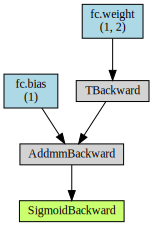

In [11]:
# visualize computational graph
x = torch.randn(1, input_dim).to(device)
torchviz.make_dot(model(x), params=dict(model.named_parameters()))

### <img src="https://img.icons8.com/cotton/64/000000/network.png" style="height:50px;display:inline"> Multi-Class (Multinomial) Logistic Regression - Softmax Regression
---
* The Logistic Regression model can be generalized to support multiple classes.
* The idea: when given an instance $x$, the Softmax Regression model first computes a score $s_k(x)$ for each class $k$, then estimates a probability of each class by applying the *softmax function* (normalized exponential) to the scores.
* The **Softmax score for class $k$**: $$ s_k(x) = \big( \theta^{(k)} \big)^T \cdot x $$ 
    * Each class has its own dedicated parameter vector $\theta^{(k)}$, which is usually stored in a row of the parameter matrix $\Theta$.

* **The Softmax Function**: $$\hat{p}_k = p(y=k|x,\theta) = \sigma(s(x))_k = \frac{e^{s_k(x)}}{\sum_{j=1}^K e^{s_j(x)}} $$
    * $K$ is the number of classes.
    * $s(x)$ is a *vector* containing the scores of each class for the instance $x$.
    * $\sigma(s(x))_k$ is the estimated probability that the instance $x$ belongs to class $k$ given the scores of each class for that instance.
* **The Softmax Regression classifier prediction**: $$\hat{y} = \underset{k}{\mathrm{argmax}} \sigma(s(x))_k = \underset{k}{\mathrm{argmax}} s_k(x) = \underset{k}{\mathrm{argmax}} \big( (\theta^{(k)})^Tx \big) $$

* **Cross-Entropy cost function**: $$ J(\Theta) = -\frac{1}{m} \sum_{i=1}^m \sum_{k=1}^K y_k^{(i)} \log(\hat{p}_k^{(i)}) $$
    * $y_k^{(i)}$ is equal to 1 if the target class for the $i^{th}$ instance is $k$, otherwise, it is 0.
    * When $K=2$ it is the BCE from the previous section.
* **Cross-Entropy gradient vector for class $k$**: $$ \nabla_{\theta^{(k)}}J(\Theta) = \frac{1}{m}\sum_{i=1}^m (\hat{p}_k^{(i)} - y_k^{(i)})x^{(i)} $$
    * Use Gradient Descent or its variants to solve
* In Scikit-Learn: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">`LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)`</a>
    * $C$ is a regularization term: the inverse of regularization strength, smaller values specify stronger regularization.

### <img src="https://img.icons8.com/nolan/64/nui2.png" style="height:50px;display:inline"> Activation Functions
---

The key change made to the Perceptron that brought upon the era of deep learning is the addition of **activation functions** to the output of each neuron. These allow the learning of **non-linear functions**. We will use three popular activation functions:
1. **Logistic function (sigmoid)**: $\sigma(z) = \frac{1}{1 + e^{-z}}$. The output is in $[0,1]$ which can be used for binary clssification or as a probability.
2. **Hyperbolic tangent function**: $tanh(z) = 2\sigma(2z) - 1$. The output is in $[-1,1]$ which tends to make each layer's output more or less normalized at the beginning of the training (which may speed up convergence).
3. **ReLU (Rectified Linear Unit) function**: $ReLU(z) = max(0,z)$. Continuous but not differentiable at $z=0$. However, it is the most common activation function as it is fast to compute and does not bound the output (which helps with some issues during Gradient Descent).

**The activation functions derivatives (for the backpropagation)**:
1. $\frac{d\sigma(z)}{dz} = \sigma(z)(1-\sigma(z))$
2. $\frac{d tanh(z)}{dz} = 1 - tanh^2(z)$
3. We define the derivative at 0 to be zero: $\frac{d ReLU(z)}{dz} = 1$ if $x>0$ else $0$

In [ ]:
# activation functions
def sigmoid(z, deriv=False):
    output = 1 / (1 + np.exp(-1.0 * z))
    if deriv:
        return output * (1 - output)
    return output

def tanh(z, deriv=False):
    output = np.tanh(z)
    if deriv:
        return 1 - np.square(output)
    return output

def relu(z, deriv=False):
    output = z if z > 0 else 0
    if deriv:
        return 1 if z > 0 else 0
    return output

In [ ]:
def plot_activations():
    x = np.linspace(-5, 5, 1000)
    y_sig = sigmoid(x)
    y_tanh = tanh(x)
    y_relu = list(map(lambda z: relu(z), x))
    fig = plt.figure(figsize=(8, 5))
    ax1 = fig.add_subplot(2,1,1)
    ax1.plot(x, y_sig, label='sigmoid')
    ax1.plot(x, y_tanh, label='tanh')
    ax1.plot(x, y_relu, label='relu')
    ax1.grid()
    ax1.legend()
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_ylim([-2, 2])
    ax1.set_title('Activation Functions')

    y_sig_derv = sigmoid(x, deriv=True)
    y_tanh_derv = tanh(x, deriv=True)
    y_relu_derv = list(map(lambda z: relu(z, deriv=True), x))
    ax2 = fig.add_subplot(2,1,2)
    ax2.plot(x, y_sig_derv, label='sigmoid')
    ax2.plot(x, y_tanh_derv, label='tanh')
    ax2.plot(x, y_relu_derv, label='relu')
    ax2.grid()
    ax2.legend()
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    # ax2.set_ylim([-2, 2])
    ax2.set_title('Activation Functions Derivatives')
    plt.tight_layout()

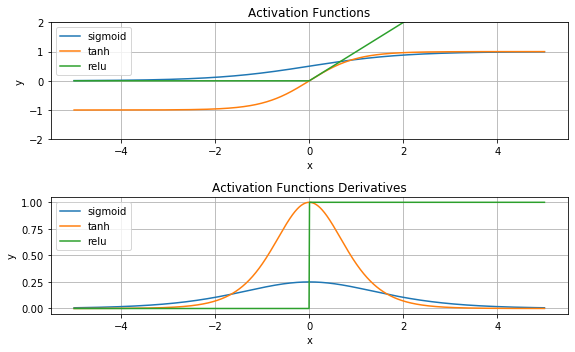

In [ ]:
# plot
plot_activations()

### <img src="https://img.icons8.com/bubbles/50/000000/video-playlist.png" style="height:50px;display:inline"> Recommended Videos
---
#### <img src="https://img.icons8.com/cute-clipart/64/000000/warning-shield.png" style="height:30px;display:inline"> Warning!
* These videos do not replace the lectures and tutorials.
* Please use these to get a better understanding of the material, and not as an alternative to the written material.

#### Video By Subject

* Pereceptron - <a href="https://www.youtube.com/watch?v=4Gac5I64LM4">Pereceptron</a>
    * <a href="https://www.youtube.com/watch?v=5g0TPrxKK6o">Perceptron Training</a>
* Logistic Regression - <a href="https://www.youtube.com/watch?v=HZ4cvaztQEs">Lecture 3 | Machine Learning (Stanford)</a>
    * <a href="https://www.youtube.com/watch?v=yIYKR4sgzI8">StatQuest: Logistic Regression</a>
* Softmax Regression - <a href="https://www.youtube.com/watch?v=LLux1SW--oM">Softmax Regression (C2W3L08)</a>
* Activation Functions - <a href="https://www.youtube.com/watch?v=Xvg00QnyaIY">Activation Functions (C1W3L06)</a>
    * <a href="https://www.youtube.com/watch?v=NkOv_k7r6no">Why Non-linear Activation Functions (C1W3L07)</a>

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons made by <a href="https://www.flaticon.com/authors/becris" title="Becris">Becris</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a>
* Icons from <a href="https://icons8.com/">Icons8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/
* Examples and code snippets were taken from <a href="http://shop.oreilly.com/product/0636920052289.do">"Hands-On Machine Learning with Scikit-Learn and TensorFlow"</a>